In [14]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#READ IN DATA, SHOW FIRST 4 ROWS

df = pd.read_csv("./seasonStats3.csv")
df.head()

Unnamed: 0  X  Season  TeamID  GamesWon  HighDay   AVGScore     AVGFGM  \
0           2  1    2003    1104        17        1  69.285714  24.035714   
1           3  2    2004    1104        17        4  72.206897  24.896552   
2           4  3    2005    1104        23        1  75.433333  25.366667   
3           5  4    2006    1104        17        2  69.965517  24.517241   
4           6  5    2007    1104        20       -1  73.612903  26.225806   

      AVGFGA   AVGFGM3  ...     RATOR     RATDR    RATAst     RATTO    RATStl  \
0  57.178571  6.357143  ...  1.245902  1.056782  1.036697  0.958763  1.193548   
1  55.000000  7.137931  ...  0.982036  1.085803  1.045593  0.987179  1.289655   
2  52.666667  7.633333  ...  0.887283  1.308072  1.121622  1.091954  0.891429   
3  54.068966  5.517241  ...  1.025424  1.195286  0.910026  1.149560  0.943590   
4  57.290323  6.451613  ...  0.981043  1.205521  0.916667  1.142857  0.772321   

     RATBlk     RATPF    RATFGP   RATFGP3    RATFTP  
0  1.191011  0.936920  1.003445  0.964029  1.002208  
1  0.909091  0.909402  1.087736  1.099131  0.999461  
2  2.111111  0.741611  1.190457  1.088705  1.128698  
3  1.158730  0.746741  1.080854  0.956370  1.027829  
4  1.314516  0.779174  1.099563  1.203124  1.029724  

[5 rows x 51 columns]

In [27]:
#PERFORM PCA, PRINT LOADING COMPONENTS

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint
df = pd.read_csv("./seasonStats2.csv")

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)]
#df = df.loc[(df['Season'] == 2004) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)] 
df = df[df["AVGFGA"] != -1]

statsToMeasure = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["RAT" + stat for stat in statsToMeasure]

selected = statsMeasured
x = df.loc[:, statsMeasured].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])


df.reset_index(inplace=True)

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <=4), "GamesWon"] = 4
principalDf.loc[(principalDf["GamesWon"] >= 5) & (principalDf["GamesWon"] <=8), "GamesWon"] = 8
principalDf.loc[(principalDf["GamesWon"] >= 9) & (principalDf["GamesWon"] <= 12), "GamesWon"] = 12
principalDf.loc[(principalDf["GamesWon"] >= 13) & (principalDf["GamesWon"] <=16), "GamesWon"] = 16
principalDf.loc[(principalDf["GamesWon"] >= 17) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <= 24), "GamesWon"] = 24
principalDf.loc[(principalDf["GamesWon"] >= 25) & (principalDf["GamesWon"] <=28), "GamesWon"] = 28
principalDf.loc[(principalDf["GamesWon"] >= 29) & (principalDf["GamesWon"] <=32), "GamesWon"] = 32
principalDf.loc[(principalDf["GamesWon"] >= 33) & (principalDf["GamesWon"] <= 36), "GamesWon"] = 36
principalDf.loc[(principalDf["GamesWon"] >= 37), "GamesWon"] = 40

print("PCA 1:")
for combo in zip(pca.components_[0], selected):
    print(f"{combo[1]:} {combo[0]}")
    
print("PCA 2:")
for combo in zip(pca.components_[1], selected):
    print(f"{combo[1]:} {combo[0]}")

print("PCA 3:")
for combo in zip(pca.components_[2], selected):
    print(f"{combo[1]:} {combo[0]}")
    
print("PCA 4:")
for combo in zip(pca.components_[3], selected):
    print(f"{combo[1]:} {combo[0]}")

    
print("PCA 5:")
for combo in zip(pca.components_[4], selected):
    print(f"{combo[1]:} {combo[0]}")
    
print("PCA 6:")
for combo in zip(pca.components_[5], selected):
    print(f"{combo[1]:} {combo[0]}")
    

PCA 1:
RATScore 0.44758872585398485
RATFGM 0.3820883117204349
RATFGA 0.07223229326002228
RATFGM3 0.14906510493480915
RATFGA3 0.030885362884439136
RATFTM 0.3022127206169811
RATFTA 0.29375999074675474
RATOR 0.1466304118591795
RATDR 0.3224541321597222
RATAst 0.35633521256455036
RATTO -0.20967933202817707
RATStl 0.205511589977155
RATBlk 0.20991584051479326
RATPF -0.2548265170530803
PCA 2:
RATScore -0.05947889949378679
RATFGM -0.1643606823825422
RATFGA -0.45431354780254446
RATFGM3 -0.2724116618329791
RATFGA3 -0.3181267993286239
RATFTM 0.31097764944708045
RATFTA 0.3262657773716318
RATOR -0.10433525766629943
RATDR 0.23416163198395737
RATAst -0.09965749708270208
RATTO 0.33165358567143405
RATStl -0.30842703454964604
RATBlk 0.04714579275455568
RATPF -0.31856647983875613
PCA 3:
RATScore 0.037529707477501124
RATFGM -0.09283309793992968
RATFGA -0.32396966630192553
RATFGM3 0.5410470621955245
RATFGA3 0.4960785790997851
RATFTM -0.04740973819043235
RATFTA -0.08554096909558231
RATOR -0.367013553676496
R

In [10]:
#PERFORM PCA, PRINT LOADING COMPONENTS

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint
df = pd.read_csv("./seasonStats3.csv")

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2003) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)]
#df = df.loc[(df['Season'] == 2004) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)] 
df = df[df["AVGFGA"] != -1]

statsToMeasure = ["Score", "FGP", "FGP3", "FTP", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["RAT" + stat for stat in statsToMeasure]

selected = statsMeasured
x = df.loc[:, statsMeasured].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])


df.reset_index(inplace=True)

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <=4), "GamesWon"] = 4
principalDf.loc[(principalDf["GamesWon"] >= 5) & (principalDf["GamesWon"] <=8), "GamesWon"] = 8
principalDf.loc[(principalDf["GamesWon"] >= 9) & (principalDf["GamesWon"] <= 12), "GamesWon"] = 12
principalDf.loc[(principalDf["GamesWon"] >= 13) & (principalDf["GamesWon"] <=16), "GamesWon"] = 16
principalDf.loc[(principalDf["GamesWon"] >= 17) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <= 24), "GamesWon"] = 24
principalDf.loc[(principalDf["GamesWon"] >= 25) & (principalDf["GamesWon"] <=28), "GamesWon"] = 28
principalDf.loc[(principalDf["GamesWon"] >= 29) & (principalDf["GamesWon"] <=32), "GamesWon"] = 32
principalDf.loc[(principalDf["GamesWon"] >= 33) & (principalDf["GamesWon"] <= 36), "GamesWon"] = 36
principalDf.loc[(principalDf["GamesWon"] >= 37), "GamesWon"] = 40

print("PCA 1:")
for combo in zip(pca.components_[0], selected):
    print(f"{combo[1]:} {combo[0]}")
    
print("PCA 2:")
for combo in zip(pca.components_[1], selected):
    print(f"{combo[1]:} {combo[0]}")

print("PCA 3:")
for combo in zip(pca.components_[2], selected):
    print(f"{combo[1]:} {combo[0]}")
    
print("PCA 4:")
for combo in zip(pca.components_[3], selected):
    print(f"{combo[1]:} {combo[0]}")

    
print("PCA 5:")
for combo in zip(pca.components_[4], selected):
    print(f"{combo[1]:} {combo[0]}")
    
print("PCA 6:")
for combo in zip(pca.components_[5], selected):
    print(f"{combo[1]:} {combo[0]}")
    

PCA 1:
RATScore 0.45083641291077364
RATFGP 0.44433812994492755
RATFGP3 0.3386396411096951
RATFTP 0.15541683541132995
RATOR 0.04335631242541247
RATDR 0.37957395931500504
RATAst 0.39163917731067255
RATTO -0.11403470298546847
RATStl 0.1143035245156923
RATBlk 0.25583303140741864
RATPF -0.26385943422214886
PCA 2:
RATScore 0.1926564501297552
RATFGP -0.09887910026925797
RATFGP3 -0.12711283768532958
RATFTP -0.027518295300719357
RATOR 0.22112194810350602
RATDR -0.3121968767391769
RATAst 0.06160506793547108
RATTO -0.6303851122915264
RATStl 0.6067589688246623
RATBlk -0.11354949803925923
RATPF 0.08717322378811349
PCA 3:
RATScore 0.057461936913921
RATFGP 0.008492085421685162
RATFGP3 -0.2326278557905924
RATFTP -0.48356830264652406
RATOR 0.7453966973975142
RATDR 0.2496212144873963
RATAst -0.04202114282717192
RATTO 0.11246765284774601
RATStl -0.09418823720447507
RATBlk -0.10117791275444553
RATPF -0.23921090490448363
PCA 4:
RATScore -0.06754107967542107
RATFGP 0.17723664054982946
RATFGP3 -0.05985505225

Text(0.5, 1.0, 'Cumulative Variance Explained by Principal Components')

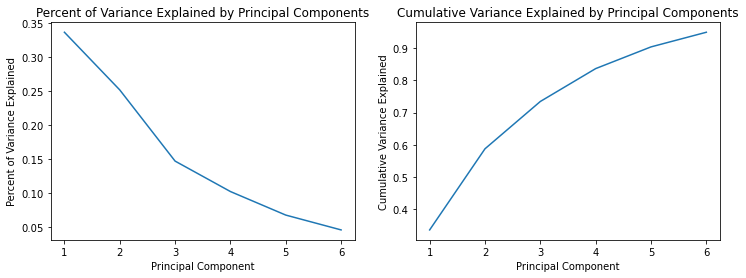

In [17]:
#PLOT VARIANCE EXPLAINED BY PCA

t = np.linspace(1,6, 6)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

EVC = np.cumsum(pca.explained_variance_ratio_)

ax1.plot(t, pca.explained_variance_ratio_)
ax1.set(xlabel = ('Principal Component'), ylabel = ('Percent of Variance Explained'))
ax1.set_title('Percent of Variance Explained by Principal Components')
ax2.plot(t, EVC)
ax2.set(xlabel = ('Principal Component'), ylabel = ('Cumulative Variance Explained'))
ax2.set_title('Cumulative Variance Explained by Principal Components')

In [18]:
print(pca.explained_variance_ratio_)

[0.33633544 0.25148234 0.14671158 0.1019144  0.06727125 0.04543869]


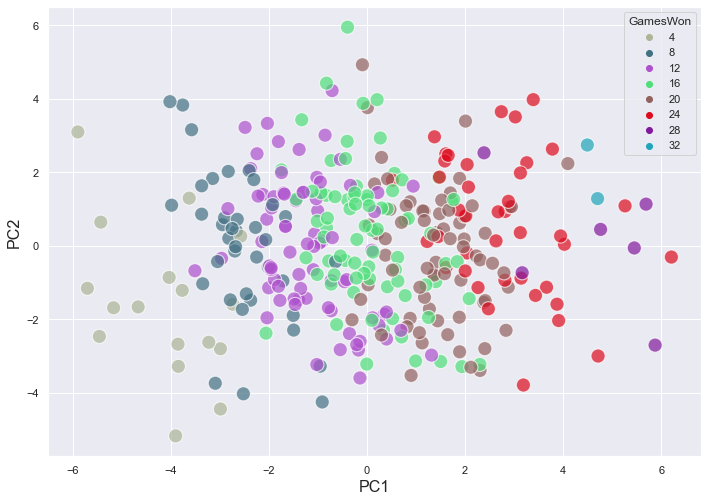

In [20]:
#GRAPH DATA ACROSS PCA, COLOR BY GAMES WON

import random
colors = []
n = 8
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc2", hue="GamesWon", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC2", size=16)

plt.savefig("./plots/pca.png",dpi=200)

plt.show()

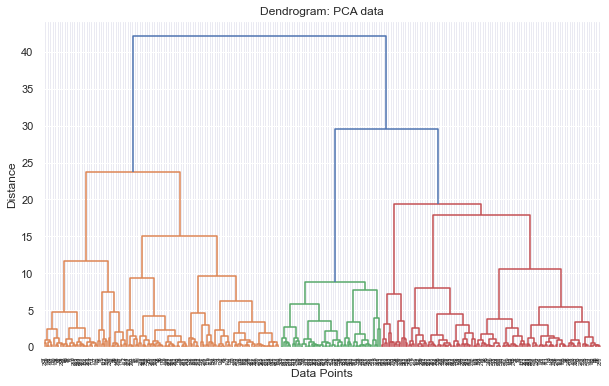

In [33]:
#AGGLOMERATIVE CLUSTERING (DENDOGRAM)

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering to obtain the linkage matrix
linkage_matrix = linkage(principalDf.loc[:, ['pc1', 'pc2']], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram: PCA data')
plt.show()

# Perform hierarchical clustering on the data
clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as desired
clusters = clustering.fit_predict(principalDf.loc[:, ['pc1', 'pc2']])

# Visualize the clusters using a scatter plot

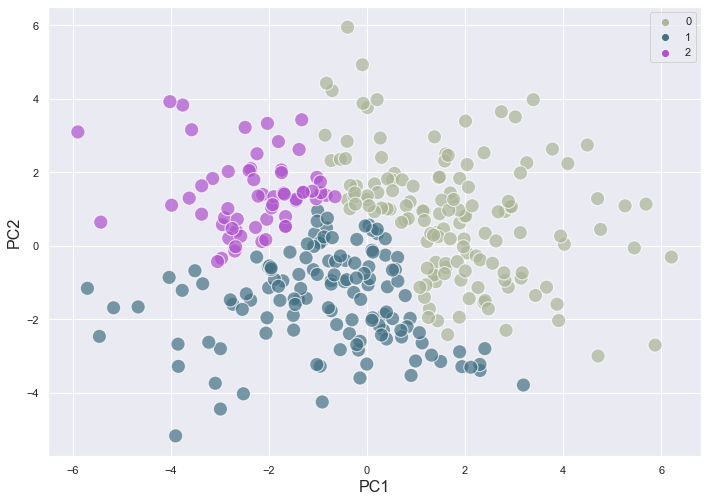

In [34]:
#GRAPH DENDOGRAM CLUSTERING

import random
colors = []
n = 3
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

    
ax = sns.scatterplot(data=principalDf, x="pc1", y="pc2", hue=clusters, palette=colors, s=200, alpha=0.7)
ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC2", size=16)
plt.show()

In [28]:
#REGRESSION ON RATIOS

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

teams = df["TeamID"].unique()
seasons = df["Season"].unique()

seasons = np.arange(2003,2023)

predictedWins = np.zeros(len(seasons))
coeffs = pd.DataFrame(columns = statsMeasured)

mea = 0
alpha1 = 0


for i, season in enumerate(seasons):
    seasonStatsMod = df.loc[df["AVGFGA3"] != 0]
    seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["Season"] == season]
    seasonStatsMod = seasonStatsMod.loc[df["AVGFGA3"] != -1]
    # seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
    X = seasonStatsMod[statsMeasured].to_numpy()
    X = StandardScaler().fit_transform(X)
    y = seasonStatsMod["GamesWon"].to_numpy()
   
    
    reg = linear_model.RidgeCV(cv=5).fit(X, y)
    #reg = linear_model.LassoCV(cv=5, random_state = 0, max_iter = 100000000).fit(X, y)
    #reg = linear_model.ElasticNetCV(cv=5, random_state = 0, max_iter = 100000000).fit(X, y)
    #reg = linear_model.LinearRegression().fit(X,y)
    
    reg_pred = reg.predict(X)
    mea = mea + mean_squared_error(reg_pred, y) 
    
    alpha1 = alpha1 + reg.alpha_
    
    # Duke = df.loc[df["TeamID"] == 1181]
    # Duke = Duke.loc[Duke["Season"] == season]
    # Duke = Duke[statsMeasured].to_numpy()
    # predictedWins[i] = reg.predict(Duke)
    
    coeffs.loc[len(coeffs)] = reg.coef_




In [8]:
data1 = [['LinearRegression', 0, 0], ['LassoCV', 0, 0], ['RidgeCV', 0, 0], ['ElasticNetCV', 0, 0]]


In [29]:
data1[2][1] = alpha1 / 21
data1[2][2] = mea / 21

print(mea / 21)

3.8861643731163698


In [13]:
coeffs

RATScore    RATFGP   RATFGP3    RATFTP     RATOR    RATDR    RATAst  \
0  0.747102  0.034095 -0.074825  0.052233 -0.042407  0.14003 -0.032762   

      RATTO    RATStl    RATBlk     RATPF  
0  0.077761  0.021172  0.076238 -0.005093

In [111]:
reg_table = pd.DataFrame(data1, columns=['Linear Regression Model', 'Optimal alpha value', 'MSE'])

In [112]:
reg_table.to_csv("./regStats.csv")

(0.0, 10.0)

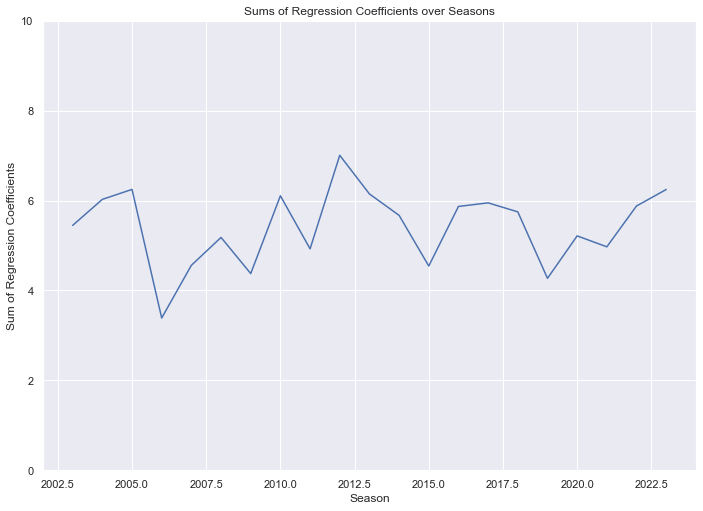

In [22]:
plt.plot(np.arange(21) + 2003,np.sum(coeffs, axis = 1))
plt.xlabel('Season')
plt.ylabel('Sum of Regression Coefficients')
plt.title('Sums of Regression Coefficients over Seasons')
plt.ylim([0,10])

In [43]:
coeffs.to_csv('LRcoeffsRAT.csv')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1437: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(None, 0)


(-2.6774208315406174, 7.628215667465409)

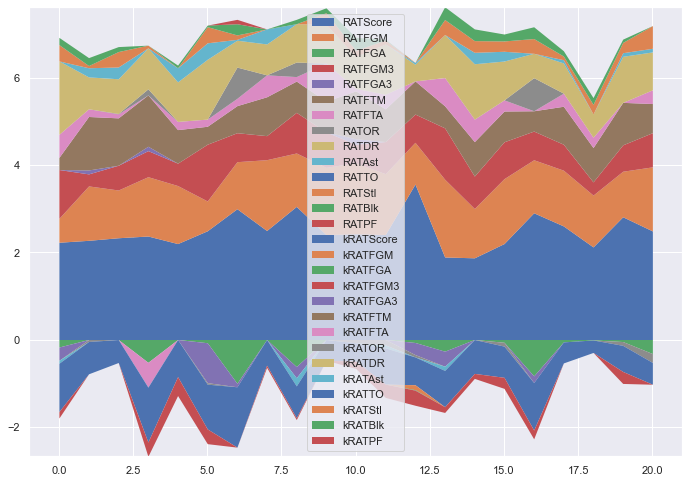

In [13]:
#GRAPH COEFFICIENT VALUES OVER SEASONS

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# split dataframe df into negative only and positive only values
coeffs_neg, coeffs_pos = coeffs.clip(upper=0), coeffs.clip(lower=0)
# stacked area plot of positive values
coeffs_pos.plot.area(ax=ax, stacked=True, linewidth=0.)
# reset the color cycle
ax.set_prop_cycle(None)
# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
coeffs_neg.rename(columns=lambda x: 'k' + x).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
ax.set_ylim([coeffs_neg.sum(axis=1).min(), coeffs_pos.sum(axis=1).max()])